In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2026-01-03 16:07:22.621232: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-03 16:07:23.125059: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-03 16:07:24.581987: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/animesh/miniconda3/envs/tf2/lib/python3.12/site-packa

In [3]:
print(tf.keras.__version__)

3.13.0


In [4]:
from keras.applications import MobileNetV2

IMAGE_SHAPE = (224, 224, 3)

base_model = MobileNetV2(
    weights="imagenet",
    include_top=True,
    input_shape=IMAGE_SHAPE
)

model = keras.Sequential([
    base_model
])

2026-01-03 16:07:25.606848: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


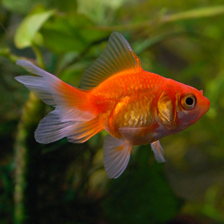

In [5]:
IMAGE_SIZE = (224, 224)
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SIZE)
gold_fish

In [6]:
def preprocess_image(image):
    image = tf.image.resize(image, IMAGE_SIZE) / 255.0
    image = tf.expand_dims(image, 0)
    return image

In [7]:
gold_fish=preprocess_image(gold_fish)

In [8]:
gold_fish.shape

TensorShape([1, 224, 224, 3])

In [9]:
result = model.predict(gold_fish)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


In [10]:
result.shape

(1, 1000)

In [11]:
predicted_label_index = np.argmax(result)
predicted_label_index

np.int64(1)

In [12]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

'/home/animesh/.keras/datasets/ImageNetLabels.txt'

In [13]:
image_labels = []
with open("/home/animesh/.keras/datasets/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [14]:
image_labels[predicted_label_index+1]

'goldfish'

In [15]:
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [16]:
data_dir='./datasets/flower_photos'

In [17]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [18]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/8960904651_9a0b727258.jpg'),
 PosixPath('datasets/flower_photos/roses/13264214185_d6aa79b3bd.jpg'),
 PosixPath('datasets/flower_photos/roses/14880561916_79aeb812fd_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2976723295_b16ab04231.jpg'),
 PosixPath('datasets/flower_photos/roses/6879112993_5a29208438_n.jpg')]

In [19]:
import PIL

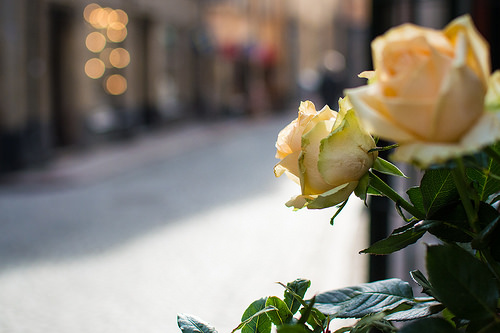

In [20]:
PIL.Image.open(str(roses[1]))

In [21]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [22]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [23]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/8960904651_9a0b727258.jpg'),
 PosixPath('datasets/flower_photos/roses/13264214185_d6aa79b3bd.jpg'),
 PosixPath('datasets/flower_photos/roses/14880561916_79aeb812fd_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2976723295_b16ab04231.jpg'),
 PosixPath('datasets/flower_photos/roses/6879112993_5a29208438_n.jpg')]

In [24]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/8960904651_9a0b727258.jpg'

In [25]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [26]:
img.shape

(295, 500, 3)

In [27]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [28]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [29]:
X = np.array(X)
y = np.array(y)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [32]:
X[2].shape

(224, 224, 3)

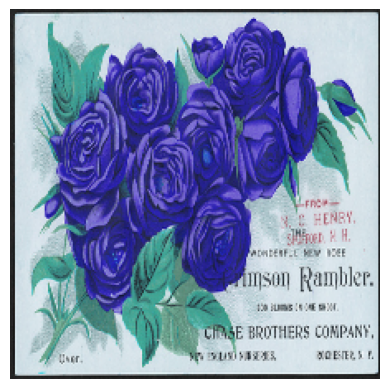

In [33]:
plt.axis('off')
plt.imshow(X[0])

In [34]:
predicted = model.predict(np.array([X[0],X[1],X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted+1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


array([550, 795, 592])

In [35]:
image_labels[550],image_labels[795],image_labels[592]

('envelope', 'shower curtain', 'handkerchief')

### Now take pre-trained model and retrain it using flowers images

In [36]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,   # ✅ CRITICAL
    input_shape=IMAGE_SHAPE
)
base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(5, activation="softmax")
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,264,389 (8.64 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [37]:
# feature_extractor_model = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-224-feature-vector/2"

# pretrained_model_without_top_layer = hub.KerasLayer(
#     feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [38]:
# num_of_flowers = 5

# model = tf.keras.Sequential([
#   pretrained_model_without_top_layer,
#   tf.keras.layers.Dense(num_of_flowers)
# ])

# model.summary()

In [39]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [40]:
model.fit(
    X_train_scaled,
    y_train,
    epochs=5,
    batch_size=16   # or even 8
)

Epoch 1/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 26s 122ms/step - accuracy: 0.7402 - loss: 0.6993
Epoch 2/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - accuracy: 0.8685 - loss: 0.3854
Epoch 3/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - accuracy: 0.8997 - loss: 0.2962
Epoch 4/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.9262 - loss: 0.2453
Epoch 5/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - accuracy: 0.9371 - loss: 0.2103


In [41]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 0.8540 - loss: 0.4497


[0.44969892501831055, 0.8540304899215698]